### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np

m = np.arange(12).reshape((3,4))
print(m)
print("Shape of the array:", m.shape)
print("Row:", m.shape[0])
print("Column:", m.shape[1])
print("Mean with numpy:", np.mean(m))
print("Mean:", m.mean())


Shape of the array: (3, 4)
Row: 3
Column: 4
Mean with numpy: 5.5
Mean: 5.5
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [24]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])


print("ResNP:", np.outer(u,v))
print("ResList:", np.array([i*v for i in u]))
print("ResBroad:", np.array(u[:,np.newaxis]*v))

ResNP: [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
ResList: [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
ResBroad: [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [25]:
np.random.seed(112)

m = np.random.rand(10,6)
print("RandArray without mask:", m)
m[m <0.1] = 0
print("RandArray with mask:", m)

RandArray without mask: [[0.37505713 0.64030462 0.95001658 0.0756772  0.77692966 0.83274576]
 [0.05480574 0.81767738 0.88535146 0.72234651 0.00255603 0.98119928]
 [0.34341985 0.09475989 0.39464259 0.00494492 0.73670683 0.95580687]
 [0.82060937 0.344983   0.37854446 0.78476361 0.08623151 0.54607394]
 [0.16222602 0.29006973 0.04500817 0.33218776 0.73653322 0.83921149]
 [0.70936161 0.18840112 0.98566856 0.38800331 0.50315448 0.76353033]
 [0.68373245 0.72195738 0.21415209 0.76309258 0.07521616 0.6108907 ]
 [0.42563042 0.23435109 0.54902872 0.57689975 0.54801626 0.1549115 ]
 [0.63256148 0.10914342 0.11470001 0.49617134 0.37723849 0.97906001]
 [0.71327899 0.06139073 0.90028092 0.94737519 0.82924856 0.15407004]]
RandArray with mask: [[0.37505713 0.64030462 0.95001658 0.         0.77692966 0.83274576]
 [0.         0.81767738 0.88535146 0.72234651 0.         0.98119928]
 [0.34341985 0.         0.39464259 0.         0.73670683 0.95580687]
 [0.82060937 0.344983   0.37854446 0.78476361 0.         

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

Limited : [0.         0.06410118 0.12820237 0.19230355 0.25640473 0.32050592
 0.3846071  0.44870828 0.51280947 0.57691065] 

Reverse : [6.34601716 6.28191598 6.21781479 6.15371361 6.08961243 6.02551124
 5.96141006 5.89730888 5.83320769 5.76910651 5.70500533 5.64090414
 5.57680296 5.51270178 5.44860059 5.38449941 5.32039823 5.25629704
 5.19219586 5.12809467 5.06399349 4.99989231 4.93579112 4.87168994
 4.80758876 4.74348757 4.67938639 4.61528521 4.55118402 4.48708284
 4.42298166 4.35888047 4.29477929 4.23067811 4.16657692 4.10247574
 4.03837456 3.97427337 3.91017219 3.84607101 3.78196982 3.71786864
 3.65376746 3.58966627 3.52556509 3.46146391 3.39736272 3.33326154
 3.26916036 3.20505917 3.14095799 3.0768568  3.01275562 2.94865444
 2.88455325 2.82045207 2.75635089 2.6922497  2.62814852 2.56404734
 2.49994615 2.43584497 2.37174379 2.3076426  2.24354142 2.17944024
 2.11533905 2.05123787 1.98713669 1.9230355  1.85893432 1.79483314
 1.73073195 1.66663077 1.60252959 1.5384284  1.47432722 1.410

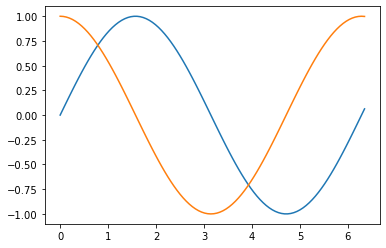

In [27]:
lin = np.linspace(0, 2*np.pi + 2*np.pi/100, 100)
print("Limited :", lin[:10], '\n')
print("Reverse :", lin[::-1], '\n')
print("Result:", [x for x in lin if np.absolute(np.cos(x)-np.sin(x))<0.1])

import matplotlib.pyplot as plt
%matplotlib inline

sin = np.sin(lin)
cos = np.cos(lin)
print("Points where cos(x) and sen(x) are close: \n",[x for x in lin if np.absolute(np.sin(x)-np.cos(x))<0.1])

plt.plot(lin,sin)
plt.plot(lin,cos)
plt.show()


5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [28]:
m = np.arange(1,11)
m = m[:,np.newaxis] * m.T
print("Original", m)
print("anti-diagonal", np.diag(m[::-1]))
print("diagnoal offset by 1 upwards", np.diag(m,1))

Original [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
anti-diagonal [10 18 24 28 30 30 28 24 18 10]
diagnoal offset by 1 upwards [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [29]:
route66 = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
d2Grid = route66 - route66.reshape(10,1)
costKm = 1.61
print("Grid: \n", format(d2Grid))
print("Grid in km: \n", format(d2Grid*costKm))

Grid: 
 [[    0   198   303   736   871  1175  1475  1544  1913  2448]
 [ -198     0   105   538   673   977  1277  1346  1715  2250]
 [ -303  -105     0   433   568   872  1172  1241  1610  2145]
 [ -736  -538  -433     0   135   439   739   808  1177  1712]
 [ -871  -673  -568  -135     0   304   604   673  1042  1577]
 [-1175  -977  -872  -439  -304     0   300   369   738  1273]
 [-1475 -1277 -1172  -739  -604  -300     0    69   438   973]
 [-1544 -1346 -1241  -808  -673  -369   -69     0   369   904]
 [-1913 -1715 -1610 -1177 -1042  -738  -438  -369     0   535]
 [-2448 -2250 -2145 -1712 -1577 -1273  -973  -904  -535     0]]
Grid in km: 
 [[    0.     318.78   487.83  1184.96  1402.31  1891.75  2374.75  2485.84
   3079.93  3941.28]
 [ -318.78     0.     169.05   866.18  1083.53  1572.97  2055.97  2167.06
   2761.15  3622.5 ]
 [ -487.83  -169.05     0.     697.13   914.48  1403.92  1886.92  1998.01
   2592.1   3453.45]
 [-1184.96  -866.18  -697.13     0.     217.35   706.79  1189.

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [30]:
import math 

N = 100
def sieve(N):
    matrix = np.ones((N-1,), dtype=bool)
    num = np.array([x for x in range(1,N)])
    for n in range(2,math.ceil(N/2)):
        prime_cond = (num%n==0) & (num > n)
        matrix[prime_cond] = False
        

def sieveOfEra(N):
    matrix = np.ones((N-1,), dtype=bool)
    num = np.array([x for x in range(1,N)])
    
    for k in range(2,math.ceil(N/2)-1):
        if(matrix[k]):
            for j in range(k**2,N-1):
                matrix[j] = False
                
# Some proves

%timeit -n 10 sieve(N)
%timeit -n 10 sieveOfEra(N)
%timeit -n 10 sieve(10*N)
%timeit -n 10 sieveOfEra(10*N)

448 µs ± 190 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
32.7 µs ± 2.13 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.51 ms ± 270 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
325 µs ± 5.97 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

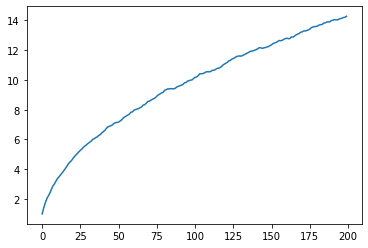

In [77]:
np.random.seed(2313)

walkers = np.zeros((1000,200))
for i in range(walkers.shape[0]):
    matrix = np.random.randint(-1,1,size=walkers.shape[1]) 
    matrix[matrix==0]=1
    walkers[i] = matrix

sum_ = np.cumsum(walkers, axis=1)
squared_sum= sum_**2
mean_ = np.mean(squared_sum, axis=0)
plt_x = plt
plt_x.plot(mean_**0.5)
plt_x.show()

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


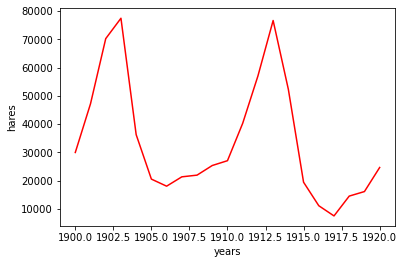

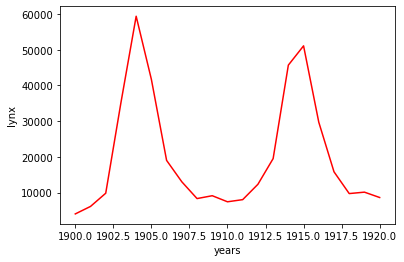

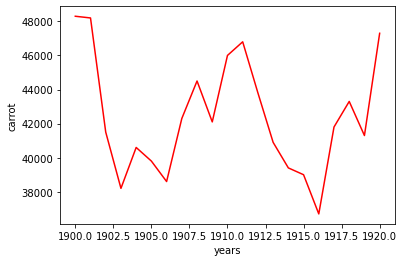

main statistical properties for hares:
sum 715700.0
min 7600.0
argmin 17
mean 34080.95238095238
median 25400.0
std 20897.906458089667
main statistical properties for lynxes:
sum 423500.0
min 4000.0
argmin 0
mean 20166.666666666668
median 12300.0
std 16254.591536908763
main statistical properties for carrots:
sum 890400.0
min 36700.0
argmin 16
mean 42400.0
median 41800.0
std 3322.5062255844787
Max populations over years
1900 : Carrots
1901 : Carrots
1902 : Hares
1903 : Hares
1904 : Lynxes
1905 : Lynxes
1906 : Carrots
1907 : Carrots
1908 : Carrots
1909 : Carrots
1910 : Carrots
1911 : Carrots
1912 : Hares
1913 : Hares
1914 : Hares
1915 : Lynxes
1916 : Carrots
1917 : Carrots
1918 : Carrots
1919 : Carrots
1920 : Carrots


In [35]:
import numpy as np
import matplotlib.pyplot as plt


Data = np.loadtxt("populations.txt", skiprows=1)
print(Data)

year = Data[:,0]
hares = Data[:,1]
lynxes = Data[:,2]
carrots = Data[:,3]

plt.figure()
plt.plot(year,hares, 'r')
plt.xlabel('years')
plt.ylabel('hares')
plt.show()

plt.figure()
plt.plot(year,lynxes, 'r')
plt.xlabel('years')
plt.ylabel('lynx')
plt.show()

plt.figure()
plt.plot(year,carrots, 'r')
plt.xlabel('years')
plt.ylabel('carrot')
plt.show()

print("main statistical properties for hares:")
for function in ['sum','min','argmin','mean','median','std']:
    print (function, getattr(np, function)(hares))
print("main statistical properties for lynxes:")
for function in ['sum','min','argmin','mean','median','std']:
    print (function, getattr(np, function)(lynxes)) 
print("main statistical properties for carrots:")
for function in ['sum','min','argmin','mean','median','std']:
    print (function, getattr(np, function)(carrots))
    
titles=['Hares','Lynxes','Carrots']   
print("Max populations over years")
for i in Data:
    print(int(i[0]),':', titles[np.argmax(i[1:])])
    